<a href="https://colab.research.google.com/github/Tobon74/Creaci-n-de-un-rbol-de-Decisi-n-/blob/main/Copia_de_%C3%81rbol_de_Decisi%C3%B3n_usando_scikit_learn_y_graficarlo_con_matplotlib_o_graphviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# 1. Importar librerías**

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

**# 2. Cargar el datasetV**

In [2]:
df = pd.read_excel("soltero.xlsx")

**# Mostrar primeras filas**

In [3]:
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   casa  guapo  edad estado_civil  dinero
0     1      1    25      soltero       1
1     2      1    15      soltero       2
2     2      1    14       casado       3
3     2      1    18       casado       2
4     1      1    35      soltero       1


In [27]:
# Información de columnas y tipos de datos
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   casa          20 non-null     int64 
 1   guapo         20 non-null     int64 
 2   edad          20 non-null     int64 
 3   estado_civil  20 non-null     object
 4   dinero        20 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 932.0+ bytes
None


In [28]:
# Verificar si existen valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
casa            0
guapo           0
edad            0
estado_civil    0
dinero          0
dtype: int64


In [29]:
# Estadísticas descriptivas (solo para numéricos)
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
            casa      guapo       edad     dinero
count  20.000000  20.000000  20.000000  20.000000
mean    1.450000   1.500000  35.550000   2.000000
std     0.510418   0.512989  22.609907   0.973329
min     1.000000   1.000000  12.000000   1.000000
25%     1.000000   1.000000  17.250000   1.000000
50%     1.000000   1.500000  27.000000   2.000000
75%     2.000000   2.000000  45.000000   2.250000
max     2.000000   2.000000  96.000000   4.000000


**# 3. Definir variables y etiqueta**

Supongamos que queremos predecir 'estado_civil'

In [4]:
X = df.drop("estado_civil", axis=1)  # Variables predictoras
y = df["estado_civil"]               # Etiqueta

**# 4. Crear el modelo de Árbol de Decisión**

In [5]:
modelo = DecisionTreeClassifier(criterion="entropy", random_state=42)
modelo.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

**# 5. Visualizar el Árbol de Decisión**

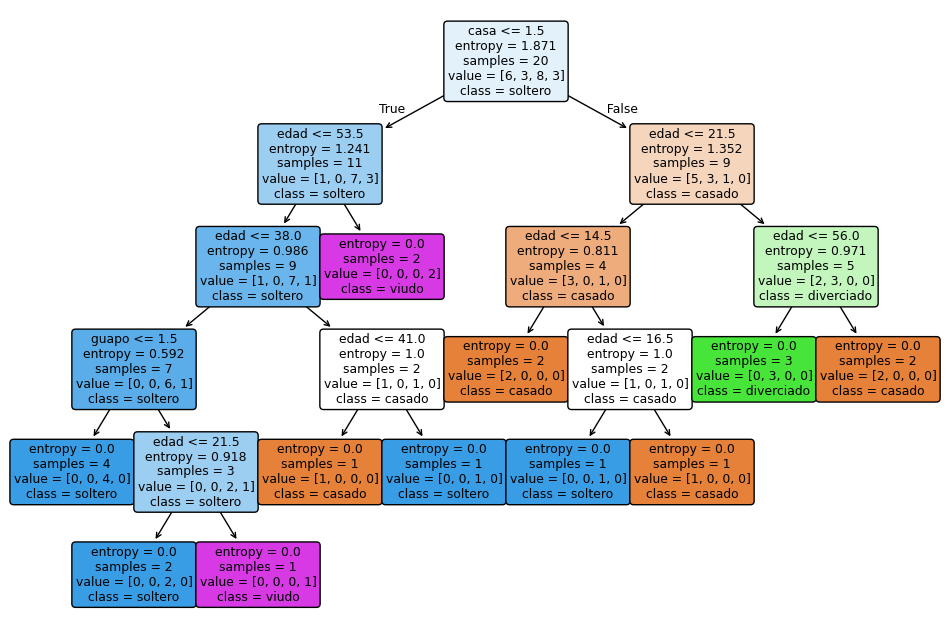

In [6]:
plt.figure(figsize=(12,8))
plot_tree(modelo,
          feature_names=X.columns,
          class_names=modelo.classes_,
          filled=True,
          rounded=True)
plt.show()

**Mejorar Visualizacion de Árbol de Decisión**

In [21]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


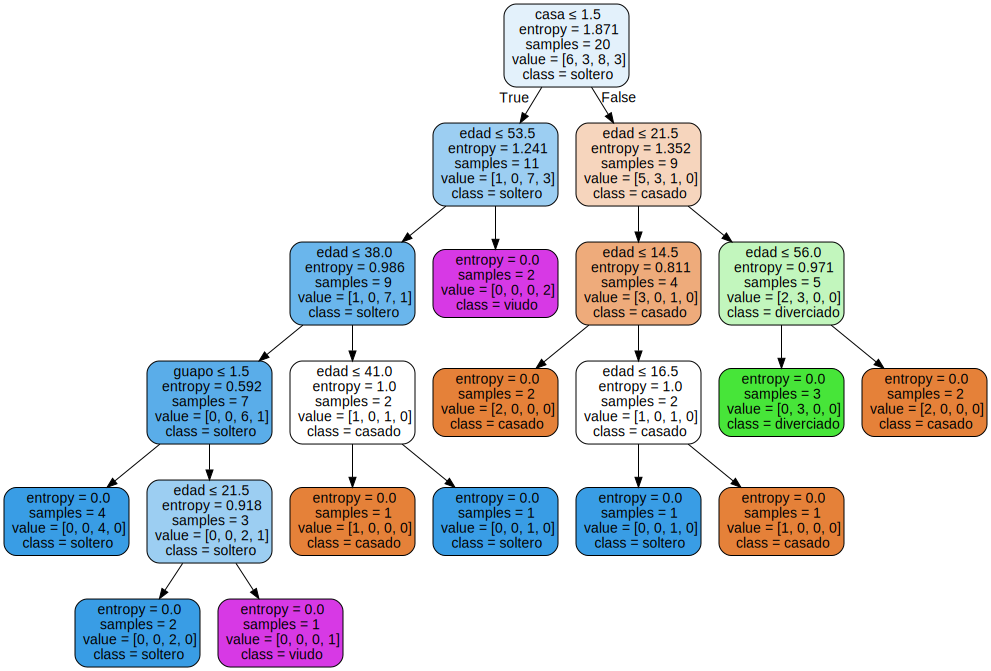

In [26]:
# ==============================
#  Árbol de Decisión con visualización Graphviz
# ==============================

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# 1. Cargar dataset
df = pd.read_excel("soltero.xlsx")

# 2. Separar variables predictoras y etiqueta
X = df.drop("estado_civil", axis=1)
y = df["estado_civil"]

# 3. Crear modelo de Árbol de Decisión
modelo = DecisionTreeClassifier(criterion="entropy", random_state=42)
modelo.fit(X, y)

# 4. Exportar a formato DOT (Graphviz)
dot_data = export_graphviz(
    modelo,
    out_file=None,
    feature_names=X.columns,
    class_names=modelo.classes_,
    filled=True,       # Colores en nodos
    rounded=True,      # Bordes redondeados
    special_characters=True
)

# 5. Visualizar con Graphviz
graph = graphviz.Source(dot_data, format="png")
graph.render("arbol_decision", view=True)  # Guarda y abre el árbol
graph


**# 6. Interpretación básica**

In [7]:
print("Exactitud del modelo con los mismos datos:", modelo.score(X, y))

Exactitud del modelo con los mismos datos: 1.0


**Ver importancia de variables**

In [30]:
importancia = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': modelo.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("Importancia de las variables en el árbol:")
print(importancia)


Importancia de las variables en el árbol:
  Variable  Importancia
2     edad     0.652752
0     casa     0.310186
1    guapo     0.037062
3   dinero     0.000000
